<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Take-notice!" data-toc-modified-id="Take-notice!-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Take notice!</a></span></li><li><span><a href="#Multiple-overlays" data-toc-modified-id="Multiple-overlays-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Multiple overlays</a></span><ul class="toc-item"><li><span><a href="#LA-Times-Neighborhoods" data-toc-modified-id="LA-Times-Neighborhoods-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>LA Times Neighborhoods</a></span></li><li><span><a href="#Get-Crime-Data-from-LA-Open-Data-Portal" data-toc-modified-id="Get-Crime-Data-from-LA-Open-Data-Portal-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Get Crime Data from LA Open Data Portal</a></span></li><li><span><a href="#Convert-data-to-a-geodataframe" data-toc-modified-id="Convert-data-to-a-geodataframe-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Convert data to a geodataframe</a></span></li><li><span><a href="#Create-a-two-layer-map" data-toc-modified-id="Create-a-two-layer-map-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Create a two layer map</a></span></li><li><span><a href="#Zoom-to-the-points,-not-the-neighborhoods" data-toc-modified-id="Zoom-to-the-points,-not-the-neighborhoods-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Zoom to the points, not the neighborhoods</a></span></li><li><span><a href="#Joining-crime-to-neighborhoods" data-toc-modified-id="Joining-crime-to-neighborhoods-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Joining crime to neighborhoods</a></span></li><li><span><a href="#The-spatial-join" data-toc-modified-id="The-spatial-join-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>The spatial join</a></span></li><li><span><a href="#Join-the-value-counts-back-to-the-neighborhoods" data-toc-modified-id="Join-the-value-counts-back-to-the-neighborhoods-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Join the value counts back to the neighborhoods</a></span></li><li><span><a href="#Map-neighborhoods-by-crime-count" data-toc-modified-id="Map-neighborhoods-by-crime-count-2.9"><span class="toc-item-num">2.9&nbsp;&nbsp;</span>Map neighborhoods by crime count</a></span></li><li><span><a href="#Cleanup:-Adding-basemaps,-titles..." data-toc-modified-id="Cleanup:-Adding-basemaps,-titles...-2.10"><span class="toc-item-num">2.10&nbsp;&nbsp;</span>Cleanup: Adding basemaps, titles...</a></span></li><li><span><a href="#Make-an-interactive-map" data-toc-modified-id="Make-an-interactive-map-2.11"><span class="toc-item-num">2.11&nbsp;&nbsp;</span>Make an interactive map</a></span></li><li><span><a href="#Get-the-center-lat/lon" data-toc-modified-id="Get-the-center-lat/lon-2.12"><span class="toc-item-num">2.12&nbsp;&nbsp;</span>Get the center lat/lon</a></span></li><li><span><a href="#Saving-as-HTML" data-toc-modified-id="Saving-as-HTML-2.13"><span class="toc-item-num">2.13&nbsp;&nbsp;</span>Saving as HTML</a></span></li></ul></li></ul></div>

<div class="alert alert-danger">

<h1>Take notice!</h1>
<ul>
    <li>Make sure you are working with a copy and not the original notebook file</li>
    <li>This class will be recorded</li>
</ul>
    
</div>

# Multiple overlays

<img src="images/mult.png">

We have focused on data exploration on single dataframes, geared to create map visualizations for individual layers. This lab goes over *overlays*, creating a single map that has multiple layers of data.

Research inquiry: Which neighborhoods in Los Angeles have the highest instances of arrests?

## LA Times Neighborhoods

* [About mapping LA neighborhoods](http://maps.latimes.com/neighborhoods/)
* [Download the data](http://boundaries.latimes.com/sets/)

In [1]:
import geopandas as gpd

In [2]:
# get neighborhood boundaries from the LA Times
neighborhoods = gpd.read_file('http://s3-us-west-2.amazonaws.com/boundaries.latimes.com/archive/1.0/boundary-set/la-county-neighborhoods-v5.geojson')

In [3]:
# trim the data to the bare minimum columns
neighborhoods = neighborhoods[['name','geometry']]
neighborhoods.head()

name                                           geometry
0            Acton  MULTIPOLYGON (((-118.20262 34.53899, -118.1894...
1  Adams-Normandie  MULTIPOLYGON (((-118.30901 34.03741, -118.3004...
2     Agoura Hills  MULTIPOLYGON (((-118.76193 34.16820, -118.7263...
3       Agua Dulce  MULTIPOLYGON (((-118.25468 34.55830, -118.2555...
4         Alhambra  MULTIPOLYGON (((-118.12175 34.10504, -118.1168...

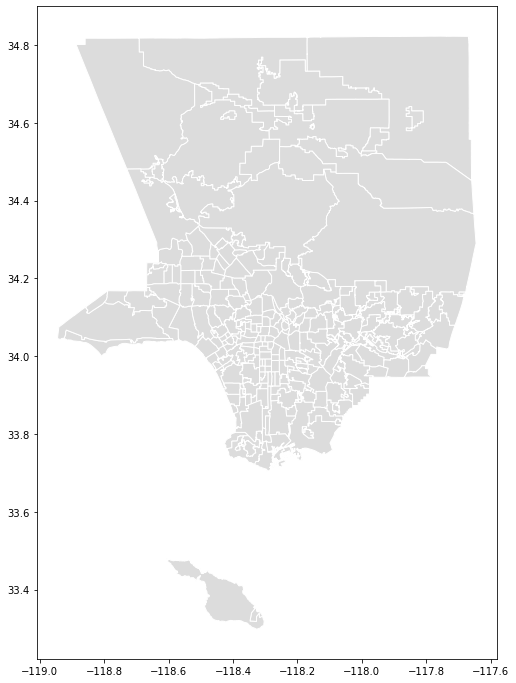

In [4]:
# plot it!
ax=neighborhoods.plot(figsize=(12,12),color='gainsboro', edgecolor='white')

## Get Crime Data from LA Open Data Portal
Next, we acquire the data using the socrata API. Use the socrata documentation to grab the code syntax for our crime data.
- https://dev.socrata.com/foundry/data.lacity.org/amvf-fr72

In [5]:
import pandas as pd
import plotly.express as px
from sodapy import Socrata

In [6]:
# connect to the data portal
client = Socrata("data.lacity.org", None)

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("amvf-fr72", 
                     limit=5000,
                     where = "arst_date between '2020-09-01T00:00:00' and '2020-09-30T00:00:00'",
                     order='arst_date desc')

# Convert to pandas DataFrame
df = pd.DataFrame.from_records(results)

# print it with .sample, which gives you random rows
df.head()

rpt_id report_type                arst_date  time area    area_desc    rd  \
0  6019649     BOOKING  2020-09-26T00:00:00.000  1340   02      Rampart  0269   
1  6019527     BOOKING  2020-09-26T00:00:00.000  0615   14      Pacific  1494   
2  6019650     BOOKING  2020-09-26T00:00:00.000  1250   07     Wilshire  0702   
3  6019578     BOOKING  2020-09-26T00:00:00.000  0920   15  N Hollywood  1531   
4  6019399     BOOKING  2020-09-26T00:00:00.000  0105   01      Central  0163   

  age sex_cd descent_cd  ...                   dispo_desc  \
0  29      M          B  ...  MISDEMEANOR COMPLAINT FILED   
1  26      M          B  ...                          NaN   
2  53      M          W  ...                          NaN   
3  41      M          H  ...  MISDEMEANOR COMPLAINT FILED   
4  19      M          W  ...  MISDEMEANOR COMPLAINT FILED   

                                  location      lat        lon  \
0  1200 W  7TH                          ST  34.0515  -118.2658   
1   400    WORLD WAY                    WY   33.942  -118.4095   
2                            SIERRA BONITA  34.0837  -118.3543   
3                                 WHITSETT  34.1758  -118.4052   
4                                      9TH   34.043  -118.2571   

                                          location_1                 bkg_date  \
0  {'type': 'Point', 'coordinates': [-118.2658, 3...  2020-09-26T00:00:00.000   
1  {'type': 'Point', 'coordinates': [-118.4095, 3...  2020-09-26T00:00:00.000   
2  {'type': 'Point', 'coordinates': [-118.3543, 3...  2020-09-26T00:00:00.000   
3  {'type': 'Point', 'coordinates': [-118.4052, 3...  2020-09-26T00:00:00.000   
4  {'type': 'Point', 'coordinates': [-118.2571, 3...  2020-09-26T00:00:00.000   

  bkg_time           bgk_location bkg_loc_cd     crsst  
0     1612  METRO - JAIL DIVISION       4273       NaN  
1     0819                PACIFIC       4214       NaN  
2     1612  METRO - JAIL DIVISION       4273   MELROSE  
3     1120      VALLEY - JAIL DIV       4279  HATTERAS  
4     0225  METRO - JAIL DIVISION       4273      HILL  

[5 rows x 25 columns]

In [7]:
df.shape

(4360, 25)

In [8]:
# columns
list(df)

['rpt_id',
 'report_type',
 'arst_date',
 'time',
 'area',
 'area_desc',
 'rd',
 'age',
 'sex_cd',
 'descent_cd',
 'chrg_grp_cd',
 'grp_description',
 'arst_typ_cd',
 'charge',
 'chrg_desc',
 'dispo_desc',
 'location',
 'lat',
 'lon',
 'location_1',
 'bkg_date',
 'bkg_time',
 'bgk_location',
 'bkg_loc_cd',
 'crsst']

## Convert data to a geodataframe

Geopandas allows us to convert different types of data into a spatial format.
- https://geopandas.org/gallery/create_geopandas_from_pandas.html

In [9]:
# convert pandas dataframe to geodataframe
crime = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lon, df.lat))

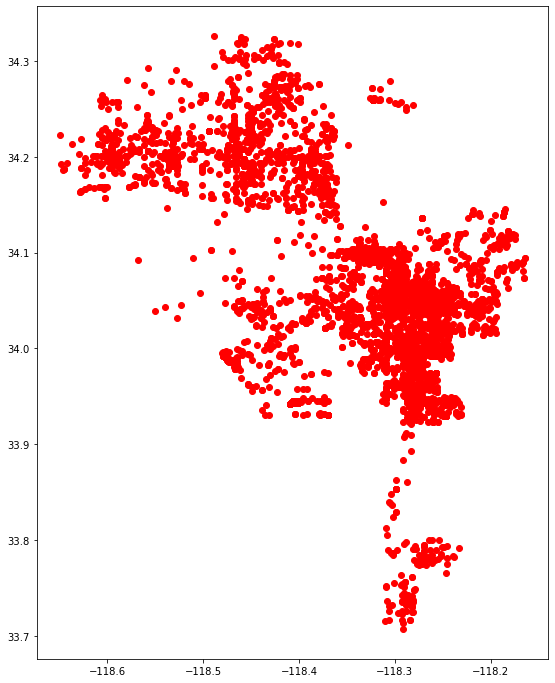

In [10]:
# map it!
crime.plot(figsize=(12,12),color='red')

## Create a two layer map

- https://geopandas.org/mapping.html

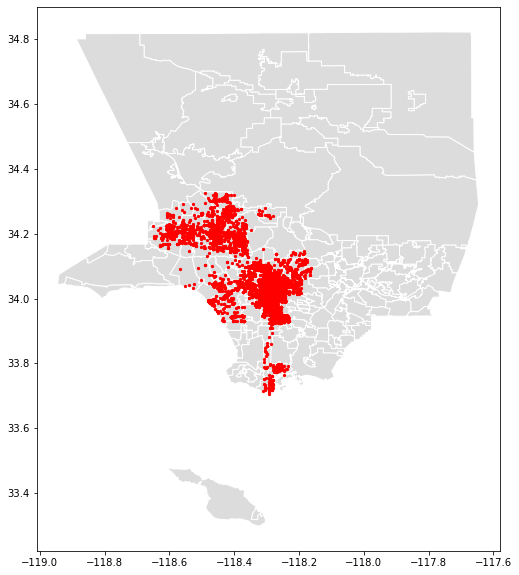

In [11]:
# first define which layers will be your "base"
base = neighborhoods.plot(figsize=(12,10),color='gainsboro', edgecolor='white')

# define the layer that will go on top, and add the base layer to the `ax` argument
ax = crime.plot(ax=base, color='red', markersize=5)

## Zoom to the points, not the neighborhoods

By default, the map has zoomed out to fit both layers. Sometimes, we may want to zoom to the extent of a smaller layer, in this case, the crime data.

In [12]:
# get the bounding box coordinates for the crime data
crime.geometry.total_bounds

array([-118.6497,   33.707 , -118.1645,   34.3261])

In [13]:
# shortcut to put them into their own variables
minx, miny, maxx, maxy = crime.geometry.total_bounds
print(minx)
print(maxx)
print(miny)
print(maxy)


-118.6497
-118.1645
33.707
34.3261


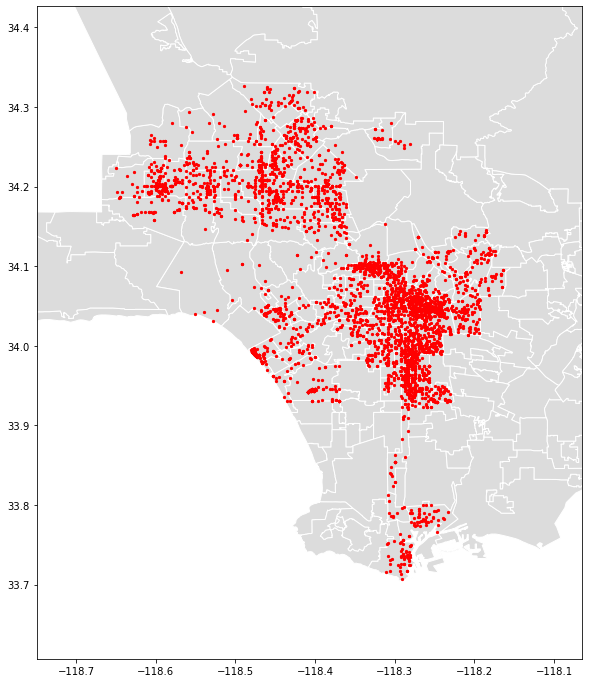

In [14]:
# use the bounding box coordinates to set the x and y limits
base = neighborhoods.plot(figsize=(12,12),color='gainsboro', edgecolor='white')
ax = crime.plot(ax=base, marker='o', color='red', markersize=5)
ax.set_xlim(minx - .1, maxx + .1) # added/substracted value is to give some margin around total bounds
ax.set_ylim(miny - .1, maxy + .1)
ax

## Joining crime to neighborhoods

Now that we have successfuly overlaid our two layers on a single map, we want to get some correlations between them. We do so first by conducting a spatial join that will allow us to summarize the number of crime instances per neighborhood.

First things first, whenever we do spatial analysis between two layers, make sure they are in the same projection.

In [15]:
# set the coordinate system to WGS84 for our crime data
crime.set_crs(epsg=4326, inplace=True)
crime.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [16]:
# check the coordinate system of our neighborhoods
neighborhoods.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## The spatial join

* https://geopandas.org/mergingdata.html?highlight=spatial%20join

In a Spatial Join, two geometry objects are merged based on their spatial relationship to one another.

The how argument specifies the type of join that will occur and which geometry is retained in the resultant geodataframe. It accepts the following options:

`left`: use the index from the first (or left_df) geodataframe that you provide to sjoin; retain only the left_df geometry column

`right`: use index from second (or right_df); retain only the right_df geometry column

`inner`: use intersection of index values from both geodataframes; retain only the left_df geometry column



In [17]:
# Do the spatial join
join = gpd.sjoin(neighborhoods,
                 crime,
                 how='right')

In [18]:
# Now every instance of crime is given a neighborhood it falls inside of
join.head()

index_left             name   rpt_id report_type  \
2672         1.0  Adams-Normandie  6009148     BOOKING   
1159         1.0  Adams-Normandie  6014888     BOOKING   
1159       232.0  University Park  6014888     BOOKING   
561          1.0  Adams-Normandie  6016613     BOOKING   
4143         1.0  Adams-Normandie  6004438     BOOKING   

                    arst_date  time area  area_desc    rd age  ...  \
2672  2020-09-09T00:00:00.000  2005   03  Southwest  0337  52  ...   
1159  2020-09-18T00:00:00.000  2200   03  Southwest  0325  47  ...   
1159  2020-09-18T00:00:00.000  2200   03  Southwest  0325  47  ...   
561   2020-09-21T00:00:00.000  2130   03  Southwest  0325  31  ...   
4143  2020-09-02T00:00:00.000  1850   03  Southwest  0326  62  ...   

                                     location      lat        lon  \
2672          30TH                         ST  34.0273  -118.3066   
1159          27TH                         ST  34.0305  -118.2915   
1159          27TH                         ST  34.0305  -118.2915   
561                                 NORMANDIE  34.0307  -118.2923   
4143  2600 S  BUDLONG                      AV  34.0309  -118.3024   

                                             location_1  \
2672  {'type': 'Point', 'coordinates': [-118.3066, 3...   
1159  {'type': 'Point', 'coordinates': [-118.2915, 3...   
1159  {'type': 'Point', 'coordinates': [-118.2915, 3...   
561   {'type': 'Point', 'coordinates': [-118.2923, 3...   
4143  {'type': 'Point', 'coordinates': [-118.3024, 3...   

                     bkg_date bkg_time bgk_location bkg_loc_cd  \
2672  2020-09-10T00:00:00.000     0017      77TH ST       4212   
1159  2020-09-19T00:00:00.000     0056      77TH ST       4212   
1159  2020-09-19T00:00:00.000     0056      77TH ST       4212   
561   2020-09-22T00:00:00.000     0132      77TH ST       4212   
4143  2020-09-02T00:00:00.000     2223      77TH ST       4212   

                                crsst                     geometry  
2672  HARVARD                      BL  POINT (-118.30660 34.02730)  
1159  VERMONT                      AV  POINT (-118.29150 34.03050)  
1159  VERMONT                      AV  POINT (-118.29150 34.03050)  
561                             ADAMS  POINT (-118.29230 34.03070)  
4143                              NaN  POINT (-118.30240 34.03090)  

[5 rows x 28 columns]

Next, we create a dataframe that counts crime by neighborhood:

In [19]:
crime_by_neighborhoods = join.name.value_counts().rename_axis('name').reset_index(name='crime_count')

In [20]:
crime_by_neighborhoods.head()

name  crime_count
0   Downtown          316
1   Van Nuys          223
2  Hollywood          203
3   Westlake          161
4   Florence          130

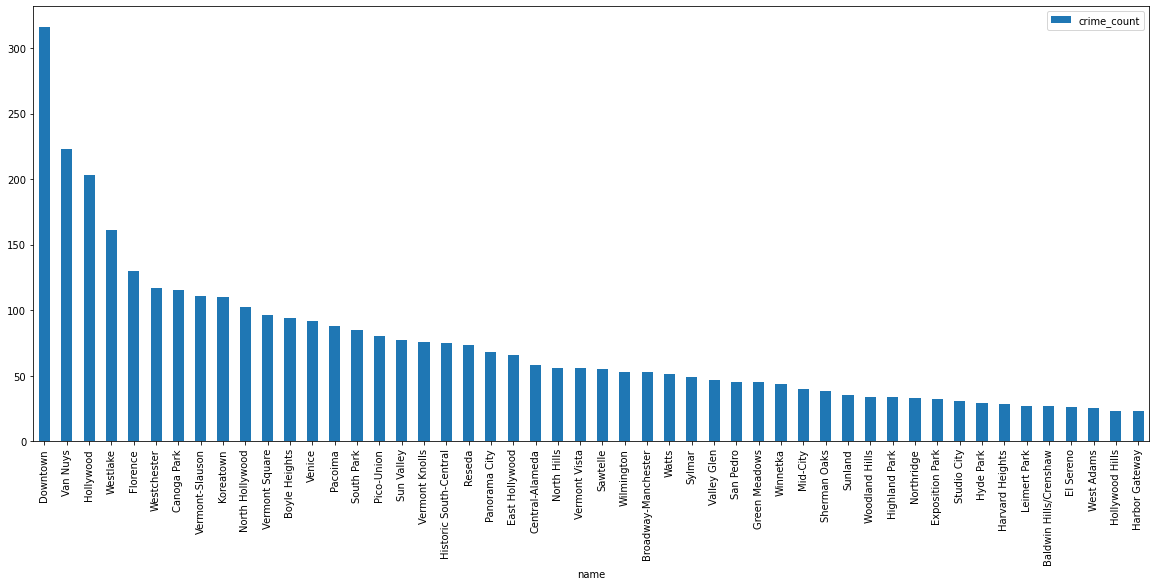

In [21]:
# make a bar chart
crime_by_neighborhoods[:50].plot.bar(figsize=(20,8),x='name',y='crime_count')

## Join the value counts back to the neighborhoods

The bar chart is nice, but what we also want is a choropleth map to accompany it. To do so, we merge the counts back to the neighborhoods.

In [22]:
# join the summary table back to the neighborhood geodatabase
neighborhoods=neighborhoods.merge(crime_by_neighborhoods,on='name')

In [23]:
# our neighborhood table now has a count column
neighborhoods.head()

name                                           geometry  \
0         Adams-Normandie  MULTIPOLYGON (((-118.30901 34.03741, -118.3004...   
1                  Arleta  MULTIPOLYGON (((-118.42202 34.22410, -118.4228...   
2       Arlington Heights  MULTIPOLYGON (((-118.31591 34.05261, -118.3134...   
3         Atwater Village  MULTIPOLYGON (((-118.27832 34.15301, -118.2770...   
4  Baldwin Hills/Crenshaw  MULTIPOLYGON (((-118.35626 34.02484, -118.3550...   

   crime_count  
0           16  
1           16  
2           15  
3           14  
4           27

## Map neighborhoods by crime count

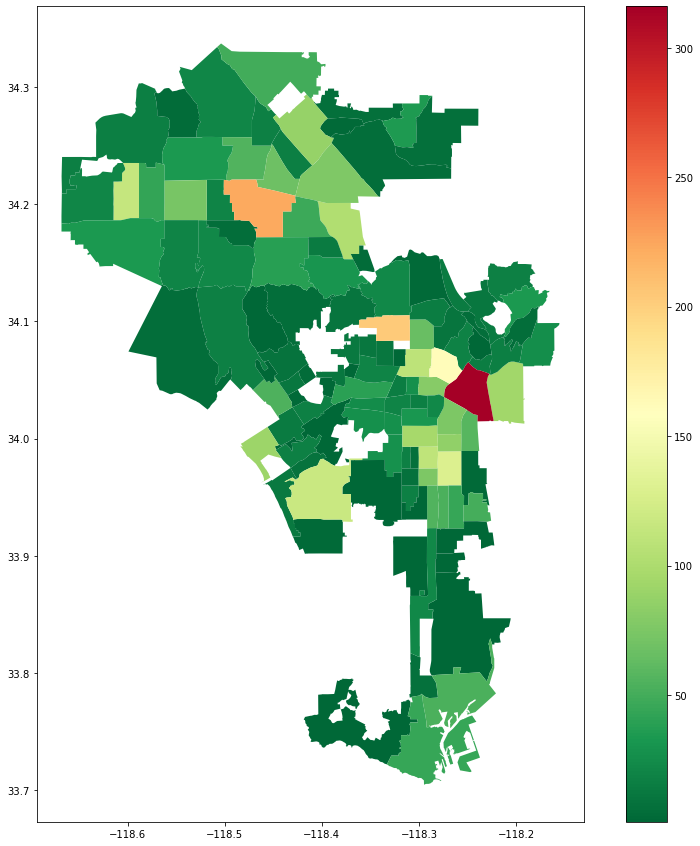

In [24]:
# plot it!
neighborhoods.plot(figsize=(15,15),column='crime_count',legend=True,cmap='RdYlGn_r')

## Cleanup: Adding basemaps, titles...

In [25]:
# for basemaps
import contextily as ctx

In [26]:
# reproject to web mercator
neighborhoods = neighborhoods.to_crs(epsg=3857)

In [37]:
# reproject to web mercator
crime = crime.to_crs(epsg=3857)

In [39]:
# shortcut to put them into their own variables
minx, miny, maxx, maxy = crime.geometry.total_bounds
print(minx)
print(maxx)
print(miny)
print(maxy)

-13208024.186774671
-13154011.969841776
3989526.8110836204
4072673.7912376425


/opt/conda/lib/python3.8/site-packages/contextily/tile.py:632: UserWarning:

The inferred zoom level of 28 is not valid for the current tile provider (valid zooms: 0 - 19).



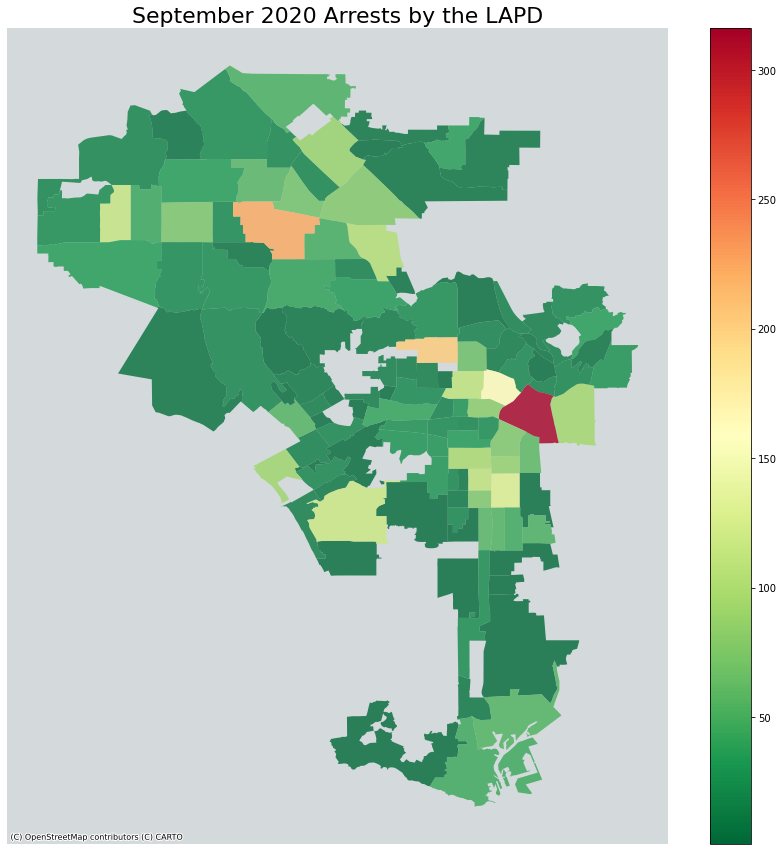

In [42]:
ax = neighborhoods.plot(figsize=(15,15),
                        column='crime_count',
                        legend=True,
                        alpha=0.8,
                        cmap='RdYlGn_r')

ax.axis('off')
ax.set_title('September 2020 Arrests by the LAPD',fontsize=22)
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

## Make an interactive map

To create an interactive version of the same map, let's use plotly express. Since we projected our data to web mercator, note that we have to project it back to WGS84 to work with plotly.

In [28]:
import plotly.express as px

In [29]:
# reproject to WGS84
neighborhoods = neighborhoods.to_crs(epsg=4326)

In [30]:
neighborhoods.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## Get the center lat/lon

Plotly maps requires you to give it center coordinates. Let's calculate this based on the data.

First, get the bounding box coordinates of the neighborhoods:

In [ ]:
minx, miny, maxx, maxy = neighborhoods.geometry.total_bounds

In [31]:
center_lat=(maxy-miny)/2+miny
center_lat

34.016549999999995

In [32]:
center_lon=(maxx-minx)/2+minx
center_lon

-118.4071

In [33]:
# map it!
fig = px.choropleth_mapbox(neighborhoods, 
                           geojson=neighborhoods.geometry, 
                           locations=neighborhoods.index, 
                           color='crime_count',
                           color_continuous_scale="rdylgn_r",
                           mapbox_style="carto-positron",
                           zoom=9, 
                           center = {"lat": center_lat, "lon": center_lon},
                           hover_name=neighborhoods.name,
                           opacity=0.5
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

## Saving as HTML

In [34]:
# save it
fig.write_html("lacrime.html")